In [7]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pickle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
os.chdir("/content/drive/")

In [10]:
%cd MyDrive/Colab Notebooks/Scene_Kaggle

/content/drive/MyDrive/Colab Notebooks/Scene_Kaggle


# Load Model

In [11]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                921664    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

# LOAD X_test and y_test

In [54]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

In [55]:
pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [56]:
X_test.shape

(3407, 150, 150, 3)

In [57]:
y_test = y_test.reshape(-1,)

In [58]:
y_test.shape

(3407,)

Scaling X_test

In [59]:
X_test = X_test/255

In [65]:
X_test

array([[[[0.18039216, 0.21176471, 0.23921569],
         [0.40784314, 0.41960784, 0.43921569],
         [0.07058824, 0.04705882, 0.05098039],
         ...,
         [0.45882353, 0.49411765, 0.50588235],
         [0.58823529, 0.62745098, 0.65490196],
         [0.07058824, 0.07058824, 0.11764706]],

        [[0.28627451, 0.31764706, 0.34509804],
         [0.36470588, 0.37647059, 0.39607843],
         [0.0627451 , 0.03529412, 0.04705882],
         ...,
         [0.46666667, 0.50588235, 0.50588235],
         [0.54901961, 0.59215686, 0.60784314],
         [0.63137255, 0.63529412, 0.6745098 ]],

        [[0.32156863, 0.34509804, 0.36470588],
         [0.3254902 , 0.3372549 , 0.35686275],
         [0.01568627, 0.        , 0.01176471],
         ...,
         [0.4627451 , 0.50196078, 0.50196078],
         [0.48235294, 0.52941176, 0.5372549 ],
         [0.52941176, 0.54117647, 0.57254902]],

        ...,

        [[0.5372549 , 0.51764706, 0.52156863],
         [0.52156863, 0.50980392, 0.49411765]

In [70]:
np.array([X_test[0].tolist()])

array([[[[0.18039216, 0.21176471, 0.23921569],
         [0.40784314, 0.41960784, 0.43921569],
         [0.07058824, 0.04705882, 0.05098039],
         ...,
         [0.45882353, 0.49411765, 0.50588235],
         [0.58823529, 0.62745098, 0.65490196],
         [0.07058824, 0.07058824, 0.11764706]],

        [[0.28627451, 0.31764706, 0.34509804],
         [0.36470588, 0.37647059, 0.39607843],
         [0.0627451 , 0.03529412, 0.04705882],
         ...,
         [0.46666667, 0.50588235, 0.50588235],
         [0.54901961, 0.59215686, 0.60784314],
         [0.63137255, 0.63529412, 0.6745098 ]],

        [[0.32156863, 0.34509804, 0.36470588],
         [0.3254902 , 0.3372549 , 0.35686275],
         [0.01568627, 0.        , 0.01176471],
         ...,
         [0.4627451 , 0.50196078, 0.50196078],
         [0.48235294, 0.52941176, 0.5372549 ],
         [0.52941176, 0.54117647, 0.57254902]],

        ...,

        [[0.5372549 , 0.51764706, 0.52156863],
         [0.52156863, 0.50980392, 0.49411765]

# Testing and Evaluating


In [ ]:
y_predict = model.predict(X_test)

In [71]:
res_1 = model.predict(np.array([X_test[0].tolist()]))

In [72]:
np.argmax(res_1)

5

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [ ]:
y_predict_labels[:10]

[5, 5, 1, 4, 1, 0, 2, 5, 3, 5]

In [ ]:
y_test[:10]

array([5, 5, 1, 3, 1, 0, 2, 5, 3, 5])

Text(69.0, 0.5, 'Truth')

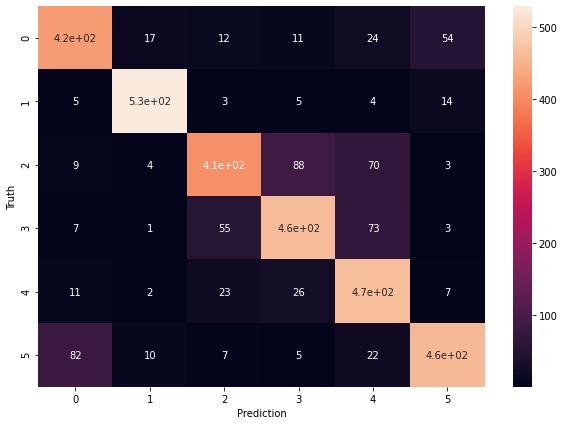

In [ ]:
from tensorflow.math import confusion_matrix
import seaborn as sn
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test,y_predict_labels,num_classes=6)
res = sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')


In [ ]:
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[422,  17,  12,  11,  24,  54],
       [  5, 529,   3,   5,   4,  14],
       [  9,   4, 409,  88,  70,   3],
       [  7,   1,  55, 465,  73,   3],
       [ 11,   2,  23,  26, 466,   7],
       [ 82,  10,   7,   5,  22, 459]], dtype=int32)>

In [ ]:
X_test[0].shape

(150, 150, 3)

In [ ]:
result = (y_predict_labels == y_test)
print(result[:10])

[ True  True  True False  True  True  True  True  True  True]


In [ ]:
acc = sum(result)/len(result)
print(acc)

0.8071617258585265


In [ ]:
y_test

array([5, 5, 1, ..., 4, 5, 5])

In [ ]:
model.evaluate(X_test, y_test)

107/107 [==============================] - 19s 174ms/step - loss: 0.8307 - accuracy: 0.1573


[0.83065265417099, 0.15732315182685852]

# Classify Image imported from URL


In [81]:
from urllib.request import urlretrieve
import PIL
import cv2
def classify_from_URL(url):
  urlretrieve(url, "sample.jpg")
  x = cv2.imread("sample.jpg")
  x_test = cv2.resize(x,(150,150,))
  label_lst = ["Buildings", "Forests", "Glacier", "Mountains",  "Sea", "Street"]
  y_predict_label = label_lst[np.argmax(model.predict(np.array([x_test.tolist()])))]
  plt.matshow(x_test)
  plt.xlabel(y_predict_label)

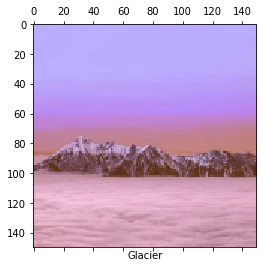

In [82]:
classify_from_URL("https://cdn140.picsart.com/271794654006201.jpg?type=webp&to=crop&r=256")

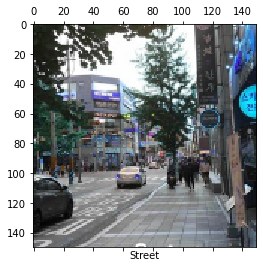

In [83]:
classify_from_URL("https://media.metrip.vn/upload_photos/g2/12965/s256x256/usr-photo-47e5e846b9fe11e9b92298be9447cc1d.jpg")

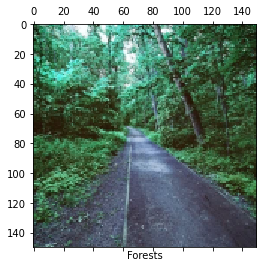

In [86]:
classify_from_URL("https://cdn131.picsart.com/330856643054201.jpg?type=webp&to=crop&r=256")

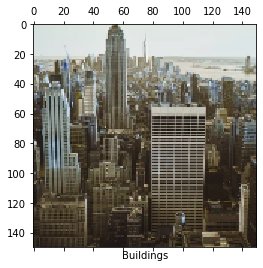

In [87]:
classify_from_URL("https://cdn130.picsart.com/323530027287201.jpg?type=webp&to=crop&r=256")

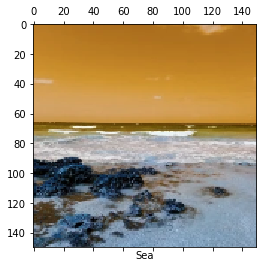

In [88]:
classify_from_URL("https://cdn131.picsart.com/323786790623201.jpg?type=webp&to=crop&r=256")

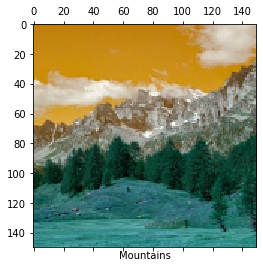

In [89]:
classify_from_URL("https://cdn131.picsart.com/336855020034201.jpg?type=webp&to=crop&r=256")